In [458]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [459]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# <font color = blue> EDA Case Study </font>

In [460]:
# reading data from csv for both previous application & current application data

prevApp_df =pd.read_csv('previous_application.csv')
appData_df =pd.read_csv('application_data.csv')

In [461]:
# checking for the shape/ row & columns in current application

appData_df.shape

(307511, 122)

In [462]:
# checking for the description of dataframe for all numeric values

appData_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [463]:
# dropping columns having null data more than or equal to 35%, we increased this from earlier planned 30%
# as one of the column OCCUPATION_TYPE was having around 31% null values which is very important for analysis

# fetching the columns having null values greater than or equal 35%

colWithHighNullValues = (appData_df.isnull().sum()/len(appData_df))
colWithHighNullValues = list(colWithHighNullValues[colWithHighNullValues.values>=0.35].index)

In [464]:
appData_df.drop(labels = colWithHighNullValues,axis =1,inplace=True) 

In [465]:
# checking the shape of dataframe

appData_df.shape

(307511, 73)

In [466]:
# dropping columns starting with FLAG_ and EXT_ as they are not needed for further analysis

column_list=[]
for i in appData_df.columns:
    if not ((i.startswith('FLAG_')) | (i.startswith('EXT_'))):
        column_list.append(i)
        
        
appData_df = appData_df.loc[:, column_list]

In [467]:
# rechecking the shape of dataframe

appData_df.shape

(307511, 43)

In [468]:
# getting info of the dataframe 

appData_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   CNT_CHILDREN                 307511 non-null  int64  
 5   AMT_INCOME_TOTAL             307511 non-null  float64
 6   AMT_CREDIT                   307511 non-null  float64
 7   AMT_ANNUITY                  307499 non-null  float64
 8   AMT_GOODS_PRICE              307233 non-null  float64
 9   NAME_TYPE_SUITE              306219 non-null  object 
 10  NAME_INCOME_TYPE             307511 non-null  object 
 11  NAME_EDUCATION_TYPE          307511 non-null  object 
 12  NAME_FAMILY_STATUS           307511 non-null  object 
 13 

In [469]:
# having a check on the columns having null values

appData_df.isnull().sum().sort_values(ascending = False)

OCCUPATION_TYPE                96391
AMT_REQ_CREDIT_BUREAU_YEAR     41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_HOUR     41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
NAME_TYPE_SUITE                 1292
OBS_30_CNT_SOCIAL_CIRCLE        1021
DEF_30_CNT_SOCIAL_CIRCLE        1021
OBS_60_CNT_SOCIAL_CIRCLE        1021
DEF_60_CNT_SOCIAL_CIRCLE        1021
AMT_GOODS_PRICE                  278
AMT_ANNUITY                       12
CNT_FAM_MEMBERS                    2
DAYS_LAST_PHONE_CHANGE             1
NAME_FAMILY_STATUS                 0
NAME_EDUCATION_TYPE                0
NAME_INCOME_TYPE                   0
CODE_GENDER                        0
AMT_CREDIT                         0
AMT_INCOME_TOTAL                   0
CNT_CHILDREN                       0
REGION_POPULATION_RELATIVE         0
NAME_CONTRACT_TYPE                 0
TARGET                             0
NAME_HOUSING_TYPE                  0
R

In [470]:
#Plans for the other null values

#OCCUPATION_TYPE                96391 --> replace with mode Laborers
#AMT_REQ_CREDIT_BUREAU_YEAR     41519 --> drop 
#AMT_REQ_CREDIT_BUREAU_MON      41519 --> drop
#AMT_REQ_CREDIT_BUREAU_WEEK     41519 --> drop
#AMT_REQ_CREDIT_BUREAU_DAY      41519 --> drop
#AMT_REQ_CREDIT_BUREAU_HOUR     41519 --> drop
#AMT_REQ_CREDIT_BUREAU_QRT      41519 --> drop
#NAME_TYPE_SUITE                 1292 --> replace with mode Unaccompanied      
#OBS_30_CNT_SOCIAL_CIRCLE        1021 --> leave like that
#DEF_30_CNT_SOCIAL_CIRCLE        1021 --> leave like that
#OBS_60_CNT_SOCIAL_CIRCLE        1021 --> leave like that
#DEF_60_CNT_SOCIAL_CIRCLE        1021 --> leave like that
#AMT_GOODS_PRICE                  278 --> replace with median
#AMT_ANNUITY                       12 --> replace with median
#CNT_FAM_MEMBERS                    2 --> replace with mode
#DAYS_LAST_PHONE_CHANGE             1 --> replace with median

In [471]:
# finding the mode  and replacing the same for all null values in "Occupation Type"

mode_OccupationType  = appData_df.OCCUPATION_TYPE.mode()
appData_df["OCCUPATION_TYPE"].fillna(mode_OccupationType[0], inplace=True)


In [472]:
appData_df["OCCUPATION_TYPE"].isnull().sum()

0

In [473]:
appData_df.isnull().sum().sort_values(ascending = False)

AMT_REQ_CREDIT_BUREAU_YEAR     41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_HOUR     41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
NAME_TYPE_SUITE                 1292
OBS_30_CNT_SOCIAL_CIRCLE        1021
DEF_30_CNT_SOCIAL_CIRCLE        1021
OBS_60_CNT_SOCIAL_CIRCLE        1021
DEF_60_CNT_SOCIAL_CIRCLE        1021
AMT_GOODS_PRICE                  278
AMT_ANNUITY                       12
CNT_FAM_MEMBERS                    2
DAYS_LAST_PHONE_CHANGE             1
NAME_HOUSING_TYPE                  0
NAME_FAMILY_STATUS                 0
NAME_EDUCATION_TYPE                0
NAME_INCOME_TYPE                   0
CODE_GENDER                        0
AMT_CREDIT                         0
AMT_INCOME_TOTAL                   0
CNT_CHILDREN                       0
DAYS_BIRTH                         0
NAME_CONTRACT_TYPE                 0
TARGET                             0
REGION_POPULATION_RELATIVE         0
R

In [474]:
# dropping columns having null data more than or equal to 10%, this we targeted to remove below columns
# as we believe for further analysis below data is no more required



#AMT_REQ_CREDIT_BUREAU_MON      41519
#AMT_REQ_CREDIT_BUREAU_WEEK     41519
#AMT_REQ_CREDIT_BUREAU_DAY      41519
#AMT_REQ_CREDIT_BUREAU_HOUR     41519
#AMT_REQ_CREDIT_BUREAU_QRT      41519

colWithHighNullValues = (appData_df.isnull().sum()/len(appData_df))
colWithHighNullValues = list(colWithHighNullValues[colWithHighNullValues.values>=0.1].index)
appData_df.drop(labels = colWithHighNullValues,axis =1,inplace=True) 

In [475]:
appData_df.shape

(307511, 37)

In [476]:
appData_df["AMT_ANNUITY"].fillna(appData_df["AMT_ANNUITY"].median(), inplace=True)
appData_df["AMT_GOODS_PRICE"].fillna(appData_df["AMT_GOODS_PRICE"].median(), inplace=True)
appData_df["CNT_FAM_MEMBERS"].fillna(appData_df["CNT_FAM_MEMBERS"].mode()[0], inplace=True)
appData_df["DAYS_LAST_PHONE_CHANGE"].fillna(appData_df["DAYS_LAST_PHONE_CHANGE"].mean(), inplace=True)
appData_df["NAME_TYPE_SUITE"].fillna(appData_df["NAME_TYPE_SUITE"].mode()[0], inplace=True)

In [477]:
appData_df.isnull().sum().sort_values(ascending = False)

OBS_60_CNT_SOCIAL_CIRCLE       1021
DEF_30_CNT_SOCIAL_CIRCLE       1021
OBS_30_CNT_SOCIAL_CIRCLE       1021
DEF_60_CNT_SOCIAL_CIRCLE       1021
DAYS_LAST_PHONE_CHANGE            0
AMT_GOODS_PRICE                   0
NAME_HOUSING_TYPE                 0
NAME_FAMILY_STATUS                0
NAME_EDUCATION_TYPE               0
NAME_INCOME_TYPE                  0
NAME_TYPE_SUITE                   0
AMT_CREDIT                        0
AMT_ANNUITY                       0
DAYS_BIRTH                        0
AMT_INCOME_TOTAL                  0
CNT_CHILDREN                      0
CODE_GENDER                       0
NAME_CONTRACT_TYPE                0
TARGET                            0
REGION_POPULATION_RELATIVE        0
DAYS_ID_PUBLISH                   0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
OCCUPATION_TYPE                   0
CNT_FAM_MEMBERS                   0
REGION_RATING_CLIENT              0
REGION_RATING_CLIENT_W_CITY       0
WEEKDAY_APPR_PROCESS_START  

In [478]:
appData_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,306490.000000,306490.000000,306490.000000,306490.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.487841,5.383163e+05,0.020868,-16036.995067,63815.045904,...,0.050769,0.040659,0.078173,0.230454,0.179555,1.422245,0.143421,1.405292,0.100049,-962.858788
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.461065,3.692890e+05,0.013831,4363.988632,141275.766519,...,0.219526,0.197499,0.268444,0.421124,0.383817,2.400989,0.446698,2.379803,0.362291,826.807143
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4292.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1570.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-757.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,-274.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,348.000000,34.000000,344.000000,24.000000,0.000000


In [488]:
# CODE_GENDER & ORGANIZATION_TYPE value XNA to be replace with mode value from their respective columns

appData_df.loc[appData_df.CODE_GENDER == 'XNA','CODE_GENDER'] = appData_df.CODE_GENDER.mode()[0]
appData_df.loc[appData_df.ORGANIZATION_TYPE == 'XNA','ORGANIZATION_TYPE'] = appData_df.ORGANIZATION_TYPE.mode()[0]

In [480]:
# all negative values for DAY_* columns to be replaced with abs() values for easier analysis
column_list=[]
for i in appData_df.columns:
    if  i.startswith('DAYS_'):
        column_list.append(i)
        
        
appData_df[column_list]= abs(appData_df[column_list])

In [481]:
appData_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,306490.000000,306490.000000,306490.000000,306490.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.487841,5.383163e+05,0.020868,16036.995067,67724.742149,...,0.050769,0.040659,0.078173,0.230454,0.179555,1.422245,0.143421,1.405292,0.100049,962.858788
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.461065,3.692890e+05,0.013831,4363.988632,139443.751806,...,0.219526,0.197499,0.268444,0.421124,0.383817,2.400989,0.446698,2.379803,0.362291,826.807143
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,7489.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,12413.000000,933.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,274.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,15750.000000,2219.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,757.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,19682.000000,5707.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,1570.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,25229.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,348.000000,34.000000,344.000000,24.000000,4292.000000


In [484]:
# DAYS_BIRTH to be coverted to years

appData_df["DAYS_BIRTH"]

0         26.0
1         46.0
2         52.0
3         52.0
4         55.0
          ... 
307506    26.0
307507    57.0
307508    41.0
307509    33.0
307510    46.0
Name: DAYS_BIRTH, Length: 307511, dtype: float64

In [483]:
appData_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,306490.000000,306490.000000,306490.000000,306490.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.487841,5.383163e+05,0.020868,43.938646,67724.742149,...,0.050769,0.040659,0.078173,0.230454,0.179555,1.422245,0.143421,1.405292,0.100049,962.858788
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.461065,3.692890e+05,0.013831,11.964047,139443.751806,...,0.219526,0.197499,0.268444,0.421124,0.383817,2.400989,0.446698,2.379803,0.362291,826.807143
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,21.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,34.000000,933.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,274.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,43.000000,2219.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,757.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,54.000000,5707.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,1570.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,69.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,348.000000,34.000000,344.000000,24.000000,4292.000000


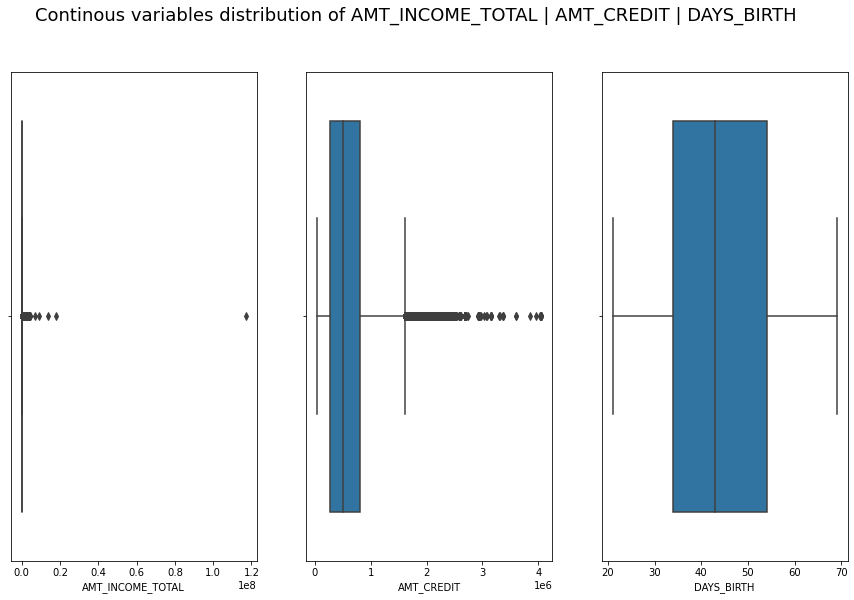

In [499]:
# Identifying some continous variables which can be binned for better analysis based on ranges


# 1. AMT_INCOME_TOTAL 2. AMT_CREDIT 3. DAYS_BIRTH

fig, axes = plt.subplots(1, 3, figsize=(15, 9))
fig.suptitle('Continous variables distribution of AMT_INCOME_TOTAL | AMT_CREDIT | DAYS_BIRTH', fontsize=18)

sns.boxplot(appData_df['AMT_INCOME_TOTAL'], ax = axes[0])
sns.boxplot(appData_df['AMT_CREDIT'], ax = axes[1])
sns.boxplot(appData_df['DAYS_BIRTH'], ax = axes[2])

plt.show()

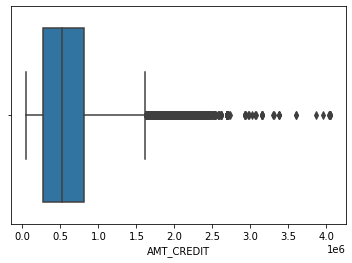

In [498]:
appdata_df['AMT_INCOME_RANGE'] = pd.qcut(appdata_df["AMT_INCOME_TOTAL"], q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
appdata['AMT_INCOME_RANGE'].head(11)

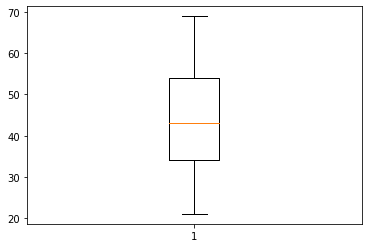

In [497]:
plt.boxplot(appData_df['DAYS_BIRTH'])
plt.show()